In [2]:

import os
import scipy.stats as ss
import numpy as np
from scipy.special import logsumexp
from scipy.signal import savgol_filter

%matplotlib inline
import seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import sys
path = "../"
sys.path.append(path)

import functions, models, gnobs, analysis_data, post_process
import read_pe_samples
from conversions import *

In [4]:
params = {'font.family': 'cursive',
          'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'xtick.direction':'in',
          'ytick.direction':'in',
          'ytick.labelsize':'large','font.size':15}
plt.rcParams.update(params)
inches_to_cm = 2.54
figsize = (40/inches_to_cm, 13/inches_to_cm)
dpi = 300

colours = {}
colours['o3'] = '#1f77b4'

In [5]:
fname = '../results/o3_mixed_ng10.hdf5'

directory = path + 'plots/' + fname.split('/')[-1][:-5]
print (directory)
if not os.path.exists(directory):
    os.makedirs(directory)

../plots/o3_mixed_ng10


In [6]:
results = {}
results['o3'] = functions.read_results(fname)

In [7]:
r = results['o3']
nobs = r['args_sampler']['nobs']
ngauss = r['args_sampler']['ngauss']

mass_ax = r['args_ppd']['mass_ax']
mch_ax = r['args_ppd']['mch_ax']
q_ax = r['args_ppd']['q_ax']
sz_ax = r['args_ppd']['sz_ax']

In [8]:
for key in results.keys():
    res = results[key]
    margl = res['posteriors']['margl']
    print(key, res['args_sampler']['nobs'], len(margl), np.round(logsumexp(margl) - np.log(len(margl)), 1), np.round(np.max(res['posteriors']['log_lkl']), 1))

o3 10 50 -36.0 -33.8


### Mass Plots

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:58: SyntaxWarning: invalid escape sequence '\m'
<>:59: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:58: SyntaxWarning: invalid escape sequence '\m'
<>:59: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_71013/3635763174.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Chirp Mass ($\mathcal{M}$) [$\mathrm{M}_\odot$]', fontsize=20)
/tmp/ipykernel_71013/363

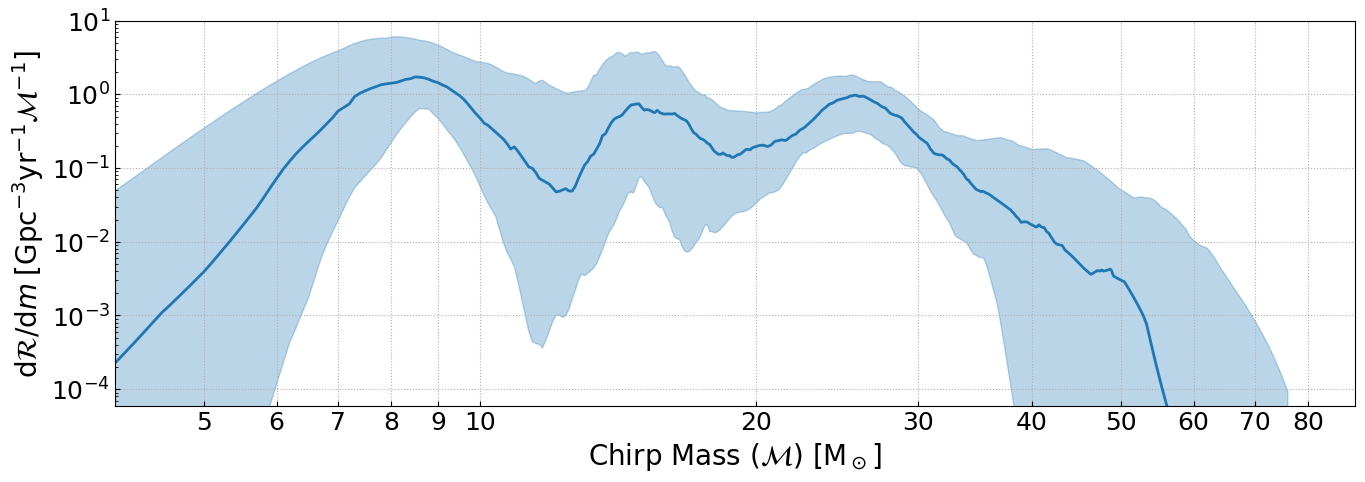

findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic fa

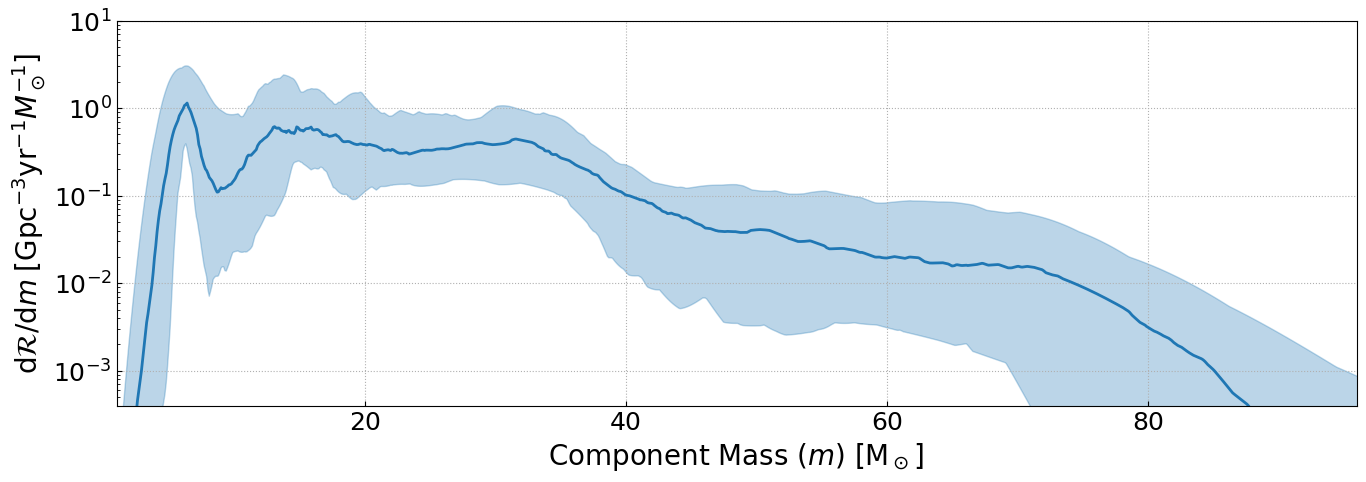

findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic fa

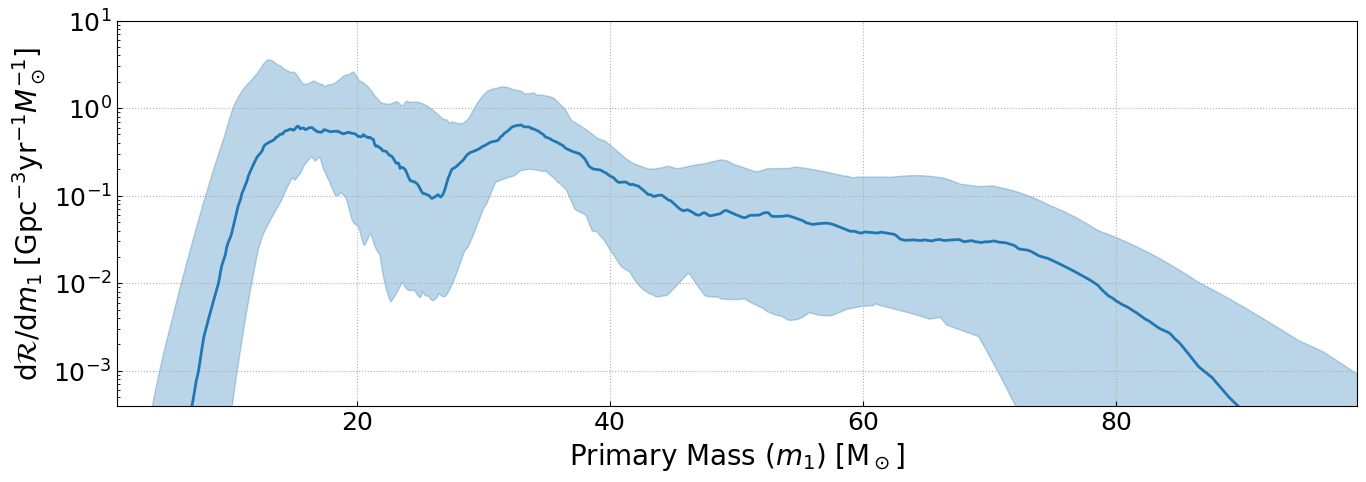

findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic fa

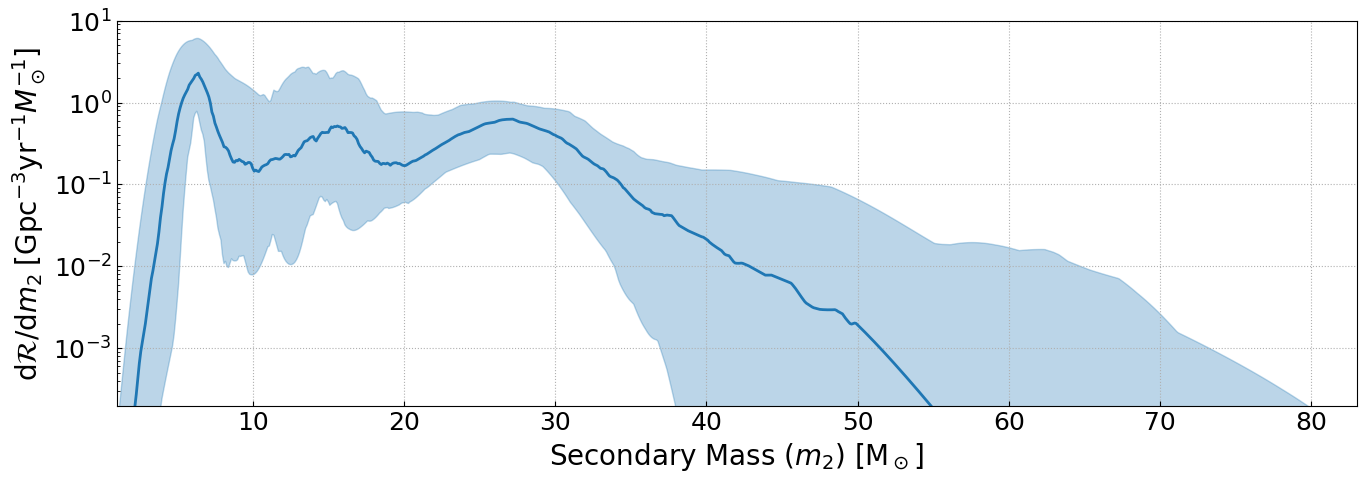

In [20]:
k = list(results.keys())[0]
r = results[k]
mass_ax = r['args_ppd']['mass_ax']
mch_ax = r['args_ppd']['mch_ax']
keys = ['o3']
fig = plt.figure(figsize = (16.0, 5.0))
p5, p50, p95 = {}, {}, {}
for ii, key in enumerate(keys):
    res = results[key]
    rate = res['posteriors']['rate']
    p5[key], p50[key], p95[key] = post_process.get_DiffRate_intervals(res['ppd']['post_pdf_mchirp'], rate, [5., 50.0, 95.])

key = 'o3'
plt.plot(mch_ax, p50[key], linewidth = 2., color = colours[key])
plt.fill_between(mch_ax, p5[key], p95[key], alpha = 0.3, color = colours[key])

plt.xlabel('Chirp Mass ($\mathcal{M}$) [$\mathrm{M}_\odot$]', fontsize=20)
plt.ylabel('$\mathrm{d}\mathcal{R}/\mathrm{d}m\;[\mathrm{Gpc}^{-3}\mathrm{yr}^{-1}\mathcal{M}^{-1}]$',fontsize=20)
plt.xlim(4, 90)
plt.xscale('log')
plt.xticks([5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80], labels=[5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80])
plt.ylim(6e-5, 10)
plt.yscale('log')
plt.grid(ls=':')
#plt.legend(loc='best')
plt.savefig(directory + '/confidence_mchirp.jpg', dpi = dpi, bbox_inches = 'tight')

fig = plt.figure(figsize = (16.0, 5.0))
p5, p50, p95 = {}, {}, {}
for ii, key in enumerate(keys):
    res = results[key]
    rate = res['posteriors']['rate']
    p5[key], p50[key], p95[key] = post_process.get_DiffRate_intervals(res['ppd']['post_pdf_mass'], rate, [5, 50., 95.])

key = 'o3'
plt.plot(mass_ax, p50[key], linewidth = 2., color = colours[key])
plt.fill_between(mass_ax, p5[key], p95[key], alpha = 0.3, color = colours[key])

plt.xlabel('Component Mass ($m$) [$\mathrm{M}_\odot$]', fontsize=20)
plt.ylabel('$\mathrm{d}\mathcal{R}/\mathrm{d}m\;[\mathrm{Gpc}^{-3}\mathrm{yr}^{-1}M_\odot^{-1}]$', fontsize=20)
plt.xlim(1, 96.)
plt.ylim(4e-4, 10)
plt.yscale('log')
plt.grid(ls=':')
plt.savefig(directory + '/confidence_m.jpg', dpi = dpi, bbox_inches = 'tight')

fig = plt.figure(figsize = (16.0, 5.0))
p5, p50, p95 = {}, {}, {}
for ii, key in enumerate(keys):
    res = results[key]
    rate = res['posteriors']['rate']
    p5[key], p50[key], p95[key] = post_process.get_DiffRate_intervals(res['ppd']['post_pdf_mass1'], rate, [5., 50., 95.])
    
key = 'o3'
plt.plot(mass_ax, p50[key], linewidth = 2., color = colours[key])
plt.fill_between(mass_ax, p5[key], p95[key], alpha = 0.3, color = colours[key])

plt.xlabel('Primary Mass ($m_1$) [$\mathrm{M}_\odot$]', fontsize=20)
plt.ylabel('$\mathrm{d}\mathcal{R}/\mathrm{d}m_1\;[\mathrm{Gpc}^{-3}\mathrm{yr}^{-1}M_\odot^{-1}]$', fontsize=20)
plt.xlim(1, 99.)
plt.ylim(4e-4, 10.)
plt.yscale('log')
plt.grid(ls=':')
plt.savefig(directory + '/confidence_m1.jpg', dpi = dpi, bbox_inches = 'tight')

fig = plt.figure(figsize = (16.0, 5.0))
p5, p50, p95 = {}, {}, {}
for ii, key in enumerate(keys):
    res = results[key]
    rate = res['posteriors']['rate']
    p5[key], p50[key], p95[key] = post_process.get_DiffRate_intervals(res['ppd']['post_pdf_mass2'], rate, [5., 50., 95.])

key = 'o3'
plt.plot(mass_ax, p50[key], linewidth = 2., color = colours[key])
plt.fill_between(mass_ax, p5[key], p95[key], alpha = 0.3, color = colours[key])

plt.xlabel('Secondary Mass ($m_2$) [$\mathrm{M}_\odot$]', fontsize=20)
plt.ylabel('$\mathrm{d}\mathcal{R}/\mathrm{d}m_2\;[\mathrm{Gpc}^{-3}\mathrm{yr}^{-1}M_\odot^{-1}]$', fontsize=20)
plt.xlim(1, 83.)
plt.ylim(2e-4, 10.)
plt.yscale('log')
plt.grid(ls=':')
plt.savefig(directory + '/confidence_m2.jpg', dpi = dpi, bbox_inches = 'tight')

### Mass Ratio and Spin - 1D, 2D

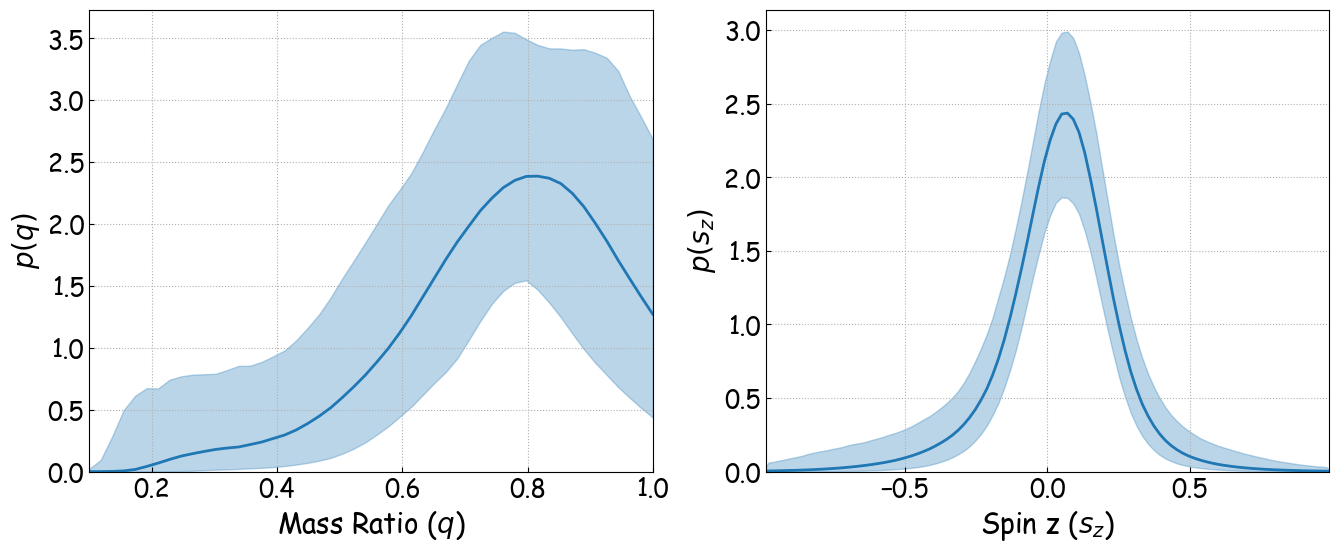

In [9]:
fig = plt.figure(figsize = (16.0, 6.0))
plt.subplot(1, 2, 1)
key = 'o3'
res = results[key]
p5, p50, p95 = post_process.get_DiffRate_intervals(res['ppd']['post_pdf_q'], 1, [5., 50., 95.])
plt.plot(q_ax, p50, color = colours[key], linewidth = 2.0)
plt.fill_between(q_ax, p5, p95, alpha = 0.3, color = colours[key])
plt.grid(ls=':')
plt.ylim(0, None)
plt.xlim(0.1, 1.0)
#plt.yscale('log')
plt.xlabel('Mass Ratio ($q$)', fontsize=20)
plt.ylabel('$p(q)$', fontsize=20)
plt.subplot(1, 2, 2)
p5, p50, p95 = post_process.get_DiffRate_intervals(res['ppd']['post_pdf_sz'], 1, [5., 50., 95.])
plt.plot(sz_ax, p50, color = colours[key], linewidth = 2.0)
plt.fill_between(sz_ax, p5, p95, alpha = 0.3, color = colours[key])
plt.grid(ls=':')
plt.ylim(0, None)
plt.xlim(-0.99, 0.99)
plt.xlabel('Spin z ($s_z$)', fontsize=20)
plt.ylabel('$p(s_z)$', fontsize=20)

plt.savefig(directory + '/confidence_q_sz.jpg', dpi = dpi, bbox_inches = 'tight')

In [10]:
z_ax = np.expm1(np.linspace(np.log(1.), np.log(1. + 1.5), 200))
cz_ax = 0.5 * (z_ax[1:] + z_ax[:-1])
Rz = {}
keys = ['o3']
for key in keys:
    res = results[key]
    w = res['posteriors']['gwts']
    rates = res['posteriors']['rate']
    ngauss = res['args_sampler']['ngauss']
    k = res['posteriors']['kappa']
    Rz[key] = []
    for ii in range(len(rates)):
        rz_mixture = 0
        kk = k[ii]
        if len(kk) == 1:
            kk = ngauss * [k[ii][0]]
        for jj in range(ngauss):
            rz_mixture += w[ii][jj] * (1 + z_ax) ** kk[jj]
        Rz[key].append(rates[ii] * rz_mixture)

/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


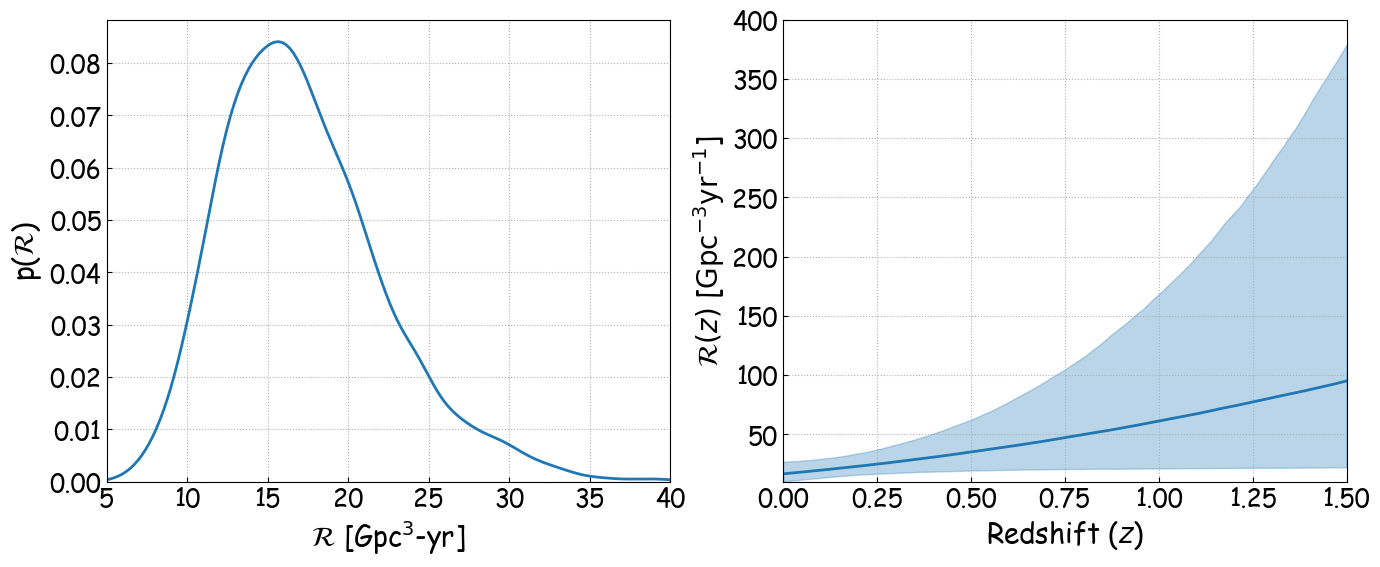

In [11]:
fig = plt.figure(figsize = (16., 6.))
plt.subplot(1, 2, 1)
for ii, key in enumerate(keys):
    rate = results[key]['posteriors']['rate']
    seaborn.kdeplot(data=rate, linewidth=2., color = colours[key])
plt.xlabel('$\mathcal{R}$ [Gpc$^3$-yr]', fontsize=20)
plt.ylabel('p($\mathcal{R}$)', fontsize=20)
plt.grid(ls=':')
plt.xlim(5., 40.)
plt.subplot(1, 2, 2)
p5, p95 = {}, {}
for ii, key in enumerate(keys):
    R = Rz[key]
    p5[key], p50, p95[key] = np.percentile(R, 5., axis = 0), np.percentile(R, 50., axis = 0), np.percentile(R, 95., axis = 0)
    plt.plot(z_ax, p50, linewidth = 2., color = colours[key])
plt.fill_between(z_ax, p5['o3'], p95['o3'], alpha = 0.3, color = colours['o3'])

plt.xlabel('Redshift ($z$)', fontsize=20)
plt.ylabel('$\mathcal{R}(z)$ [$\mathrm{Gpc}^{-3} \mathrm{yr} ^{-1}$]', fontsize=20)
#plt.yscale('log')
plt.grid(ls=':')
plt.xlim(0, 1.5)
plt.ylim(10, 400)
plt.savefig(directory + '/rate_zevol.jpg', dpi = dpi, bbox_inches = 'tight')

In [12]:
print (rate.mean(), np.percentile(rate, 5.0), np.percentile(rate, 95))

17.281437 10.264112281799317 26.856437873840335


### Make 2D plots

In [13]:
# May take up to half an hour
res = results['o3']
ngauss = res['args_sampler']['ngauss']
locs_m1 = res['posteriors']['locs_m1']
stds_m1 = res['posteriors']['stds_m1']
locs_m2 = res['posteriors']['locs_m2']
stds_m2 = res['posteriors']['stds_m2']
corr_m1m2 = res['posteriors']['corr_m1m2']
norm_m1m2 = res['posteriors']['norm_m1m2']

locs_sz = res['posteriors']['locs_sz']
stds_sz = res['posteriors']['stds_sz']
gwts = res['posteriors']['gwts']
rate = res['posteriors']['rate']
kappa = res['posteriors']['kappa']

# Gridding is 3D is too expensive. Calculate correlations using samples
# Use the loop to also calculate PDF on the m1-m2 plane

max_spin = 0.99
npost = len(rate)
rate_m1m2 = 0
rate_ratio_m1 = []
rate_ratio_m2 = []
massax = mass_ax[::2] # take a coarser grid then the 1D plot
xy, yx = np.meshgrid(massax, massax)
idxm1m2 = np.where(yx / xy > 1) # ensure mass-ratio is less than 1
samples = {}
samples['m1'], samples['m2'], samples['sz'], samples['z'] = [], [], [], []
for ii in range(npost):
    pdfm1m2, dRdm1dm2_at_z = 0, 0
    m1samp, m2samp, szsamp, zsamp = [], [], [], []
    for jj in range(ngauss):
        mean = [locs_m1[ii][jj], locs_m2[ii][jj]]
        cov = np.diag([stds_m1[ii][jj] ** 2, stds_m2[ii][jj] ** 2])
        cov[0][1] = cov[1][0] = stds_m1[ii][jj] * stds_m2[ii][jj] * corr_m1m2[ii][jj]
        rv = ss.multivariate_normal(mean=mean, cov=cov)
        
        n = int(16000 * gwts[ii][jj] * rate[ii] / rate[ii].mean() + 0.5)
        x = rv.rvs(size=n)
        m1, m2 = x.T
        a, b = (-max_spin - locs_sz[ii][jj]) / stds_sz[ii][jj], (max_spin - locs_sz[ii][jj]) / stds_sz[ii][jj]
        sz = ss.truncnorm.rvs(a = a, b = b, loc = locs_sz[ii][jj], scale = stds_sz[ii][jj], size=n)
        m1samp, m2samp, szsamp = np.append(m1samp, m1), np.append(m2samp, m2), np.append(szsamp, sz)
        z = gnobs.astro_redshifts(models.sfr_1pz, z_max=1.5, nsamples=n, kappa=kappa[ii][jj])
        zsamp = np.append(zsamp, z)
        
        pdf = rv.pdf(np.dstack((xy, yx)))
        pdf[idxm1m2] = 0
        pdf *= (gwts[ii][jj] / norm_m1m2[ii][jj])
        pdfm1m2 += pdf#differential rate at z=0 for rate=1
        dRdm1dm2_at_z += pdf * 1.5 ** kappa[ii][jj]#differential rate at z=0.5 for (rate=1 at z=0)
    
    rate_m1m2 += pdfm1m2 * rate[ii]
    rate_ratio_m1.append(np.sum(dRdm1dm2_at_z, axis=0) / np.sum(pdfm1m2, axis=0))
    rate_ratio_m2.append(np.sum(dRdm1dm2_at_z, axis=1) / np.sum(pdfm1m2, axis=1))

    idx = np.where((m2samp / m1samp < 1) & (np.minimum(m1samp, m2samp) > 0) & (np.abs(szsamp) < 0.99))
    idx = np.random.choice(idx[0], size=8000, replace=False)
    samples['m1'] = np.append(samples['m1'], m1samp[idx])
    samples['m2'] = np.append(samples['m2'], m2samp[idx])
    samples['sz'] = np.append(samples['sz'], szsamp[idx])
    samples['z'] = np.append(samples['z'], zsamp[idx])
    
    if ii % 500 == 0:
        print (ii,'/',len(rate))
rate_m1m2 /= ii

0 / 5000
500 / 5000
1000 / 5000
1500 / 5000
2000 / 5000
2500 / 5000
3000 / 5000
3500 / 5000
4000 / 5000
4500 / 5000


/tmp/ipykernel_1972482/2621504294.py:4: UserWarning: Log scale: values of z <= 0 have been masked
  ax1 = plt.contourf(xy, yx, rate_m1m2,levels=l, cmap=plt.cm.gist_ncar_r, norm = mpl.colors.LogNorm())
/tmp/ipykernel_1972482/2621504294.py:17: UserWarning: Log scale: values of z <= 0 have been masked
  ax1 = plt.contourf(X, Y, R,levels=l, cmap=plt.cm.gist_ncar_r, norm = mpl.colors.LogNorm())


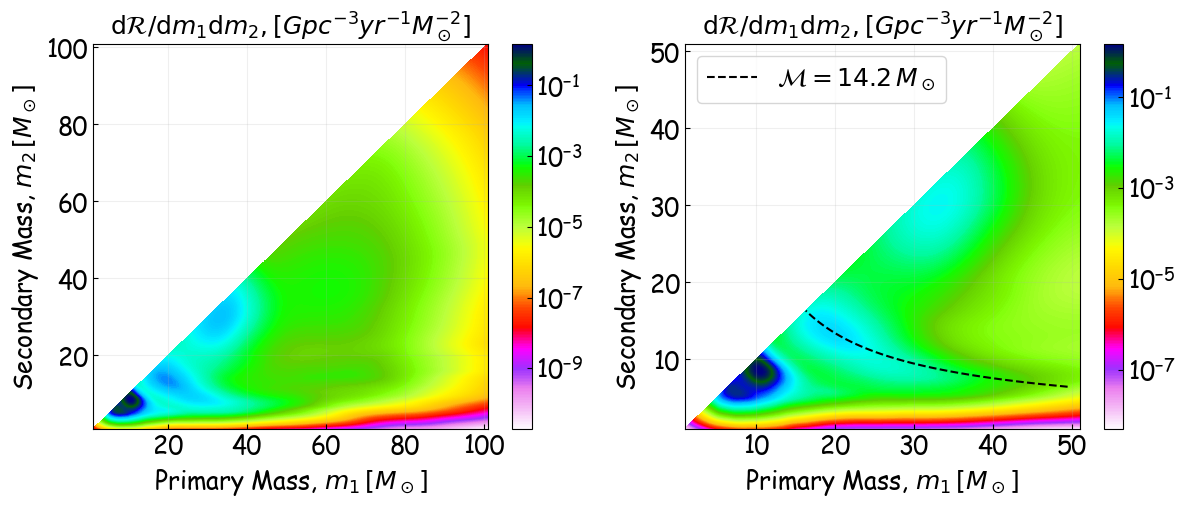

In [14]:
fig = plt.figure(figsize = (14.0, 5.0))
plt.subplot(1, 2, 1)
l = np.exp(np.linspace(np.log(rate_m1m2[rate_m1m2 > 0].min()), np.log(rate_m1m2.max()), 500))
ax1 = plt.contourf(xy, yx, rate_m1m2,levels=l, cmap=plt.cm.gist_ncar_r, norm = mpl.colors.LogNorm())

l = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1]
plt.title('$\mathrm{d}\mathcal{R}/\mathrm{d}m_1\mathrm{d}m_2, [Gpc^{-3}yr^{-1}M_\odot^{-2}]$')
cbar = plt.colorbar(ticks=l)
plt.xlabel('Primary Mass, $m_1\, [M_\odot]$')
plt.ylabel('Secondary Mass, $m_2\, [M_\odot]$')
plt.grid(alpha=0.2)
plt.subplot(1, 2, 2)
X = xy[0:251, 0:251]
Y = yx[0:251, 0:251]
R = rate_m1m2[0:251, 0:251]
l = np.exp(np.linspace(np.log(R[R > 0].min()), np.log(R.max()), 500))
ax1 = plt.contourf(X, Y, R,levels=l, cmap=plt.cm.gist_ncar_r, norm = mpl.colors.LogNorm())

qax = np.linspace(0.13, 1.0, 100)
m1ax, m2ax = qmch_to_m1m2(14.2, qax) 
plt.plot(m1ax, m2ax, color='k', linestyle='--', label='$\mathcal{M}=14.2\,M_\odot$')

l = [1e-7, 1e-5, 1e-3, 1e-1]
plt.title('$\mathrm{d}\mathcal{R}/\mathrm{d}m_1\mathrm{d}m_2, [Gpc^{-3}yr^{-1}M_\odot^{-2}]$')
cbar = plt.colorbar(ticks=l)
plt.xlabel('Primary Mass, $m_1\, [M_\odot]$')
plt.ylabel('Secondary Mass, $m_2\, [M_\odot]$')
plt.grid(alpha=0.2)
plt.legend(loc='upper left')
plt.savefig(directory + '/dRdm1dm2.jpg', dpi = dpi, bbox_inches = 'tight')

In [15]:
samples['mch'], samples['q'] = m1m2_to_mchq(samples['m1'], samples['m2'])
samples['M'] = samples['m1'] + samples['m2']
samples['abs_sz'] = np.abs(samples['sz'])

# Calculate the correlations
p5_corr, p50_corr, p95_corr = {}, {}, {}
xax, xvar, yvar = {}, {}, {}
keys = ['qsz', 'm1_abs_sz', 'M_abs_sz', 'mch_abs_sz', 'm1q', 'Mq', 'mchq', 'zsz', 'zq']

key = 'qsz'
xax[key] = q_ax
xvar[key] = 'q'
yvar[key] = 'sz'

key = 'm1_abs_sz'
xax[key] = mass_ax[::5]
xvar[key] = 'm1'
yvar[key] = 'abs_sz'

key = 'mch_abs_sz'
xax[key] = mch_ax[::5]
xvar[key] = 'mch'
yvar[key] = 'abs_sz'

key = 'M_abs_sz'
xax[key] = np.linspace(10.0, 160.0, 301)
xvar[key] = 'M'
yvar[key] = 'abs_sz'

key = 'mchq'
xax[key] = mch_ax[::5]
xvar[key] = 'mch'
yvar[key] = 'q'

key = 'm1q'
xax[key] = mass_ax[::5]
xvar[key] = 'm1'
yvar[key] = 'q'

key = 'Mq'
xax[key] = np.linspace(10.0, 160.0, 301)
xvar[key] = 'M'
yvar[key] = 'q'

key = 'zsz'
xax[key] = z_ax
xvar[key] = 'z'
yvar[key] = 'sz'

key = 'zq'
xax[key] = z_ax
xvar[key] = 'z'
yvar[key] = 'q'

for key in keys:
    print ('Processing key:', key)
    p5_corr[key], p50_corr[key], p95_corr[key] = [], [], []
    
    for ii in np.arange(len(xax[key]) - 1):
        idx = np.where((samples[xvar[key]] > xax[key][ii]) & (samples[xvar[key]] < xax[key][ii+1]))
        
        if len(idx[0]) < 10:
            p5_corr[key] = np.append(p5_corr[key], 0)
            p50_corr[key] = np.append(p50_corr[key], 0)
            p95_corr[key] = np.append(p95_corr[key], 0)
        else:
            p5_corr[key] = np.append(p5_corr[key], np.percentile(samples[yvar[key]][idx], 5.0))
            p50_corr[key] = np.append(p50_corr[key], np.percentile(samples[yvar[key]][idx], 50.0))
            p95_corr[key] = np.append(p95_corr[key], np.percentile(samples[yvar[key]][idx], 95.0))

Processing key: qsz
Processing key: m1_abs_sz
Processing key: M_abs_sz
Processing key: mch_abs_sz
Processing key: m1q
Processing key: Mq
Processing key: mchq
Processing key: zsz
Processing key: zq


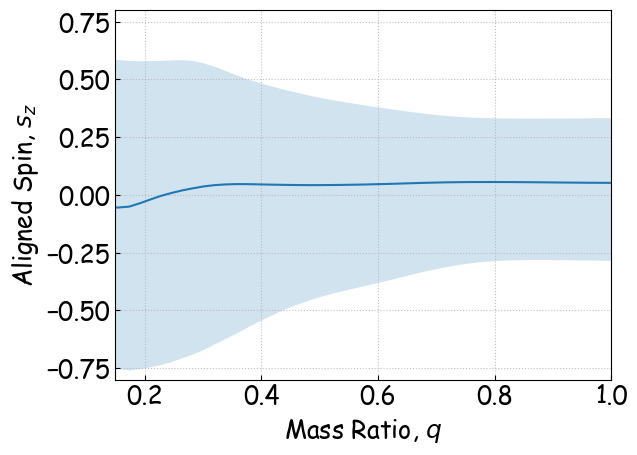

In [16]:
key = 'qsz'
plt.plot(xax[key][1:], savgol_filter(p50_corr[key], 5, 1), color=colours['o3'])
plt.fill_between(q_ax[1:], savgol_filter(p5_corr[key], 5, 1), savgol_filter(p95_corr[key], 5, 1), alpha=0.2)
plt.xlim(0.15, 1.0)
plt.ylim(-0.8, 0.8)
plt.grid(linestyle=':', alpha=0.8)
plt.xlabel('Mass Ratio, $q$')
plt.ylabel('Aligned Spin, $s_z$')
plt.savefig(directory + '/corr_' + key + '.jpg', dpi = dpi, bbox_inches = 'tight')

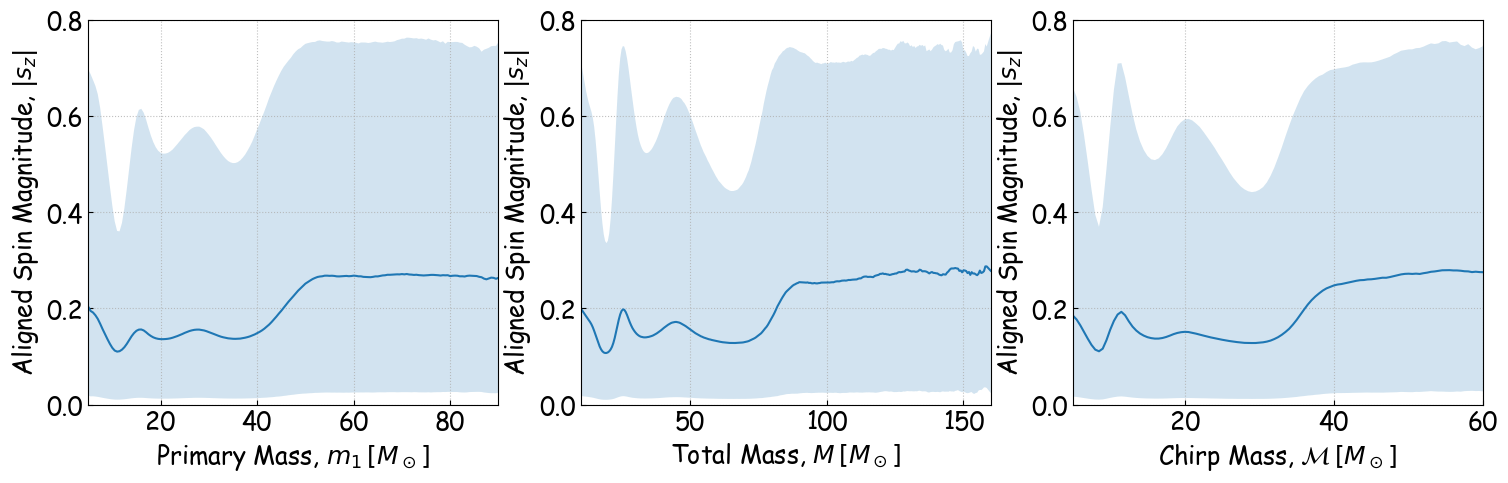

In [17]:
fig = plt.figure(figsize = (18.0, 5.0))
plt.subplot(1, 3, 1)
key1 = 'm1_abs_sz'
plt.plot(xax[key1][1:], savgol_filter(p50_corr[key1], 7, 1), color=colours['o3'])
plt.fill_between(xax[key1][1:], savgol_filter(p5_corr[key1], 7, 1), savgol_filter(p95_corr[key1], 7, 1), alpha=0.2)
plt.xlim(5.0, 90.0)
plt.ylim(0, 0.8)
plt.grid(linestyle=':', alpha=0.8)
plt.xlabel('Primary Mass, $m_1\, [M_\odot]$')
plt.ylabel('Aligned Spin Magnitude, $|s_z|$')
plt.subplot(1, 3, 2)
key2 = 'M_abs_sz'
plt.plot(xax[key2][1:], savgol_filter(p50_corr[key2], 7, 1), color=colours['o3'])
plt.fill_between(xax[key2][1:], savgol_filter(p5_corr[key2], 7, 1), savgol_filter(p95_corr[key2], 7, 1), alpha=0.2)
plt.xlim(10.0, 160.0)
plt.ylim(0, 0.8)
plt.grid(linestyle=':', alpha=0.8)
plt.xlabel('Total Mass, $M\, [M_\odot]$')
plt.ylabel('Aligned Spin Magnitude, $|s_z|$')
plt.subplot(1, 3, 3)
key3 = 'mch_abs_sz'
plt.plot(xax[key3][1:], savgol_filter(p50_corr[key3], 5, 1), color=colours['o3'])
plt.fill_between(xax[key3][1:], savgol_filter(p5_corr[key3], 5, 1), savgol_filter(p95_corr[key3], 5, 1), alpha=0.2)
plt.xlim(5.0, 60.0)
plt.ylim(0, 0.8)
plt.grid(linestyle=':', alpha=0.8)
plt.xlabel('Chirp Mass, $\mathcal{M}\, [M_\odot]$')
plt.ylabel('Aligned Spin Magnitude, $|s_z|$')
plt.savefig(directory + '/corr_' + key1 + '_' + key2 + '_' + key3 + '.jpg', dpi = dpi, bbox_inches = 'tight')

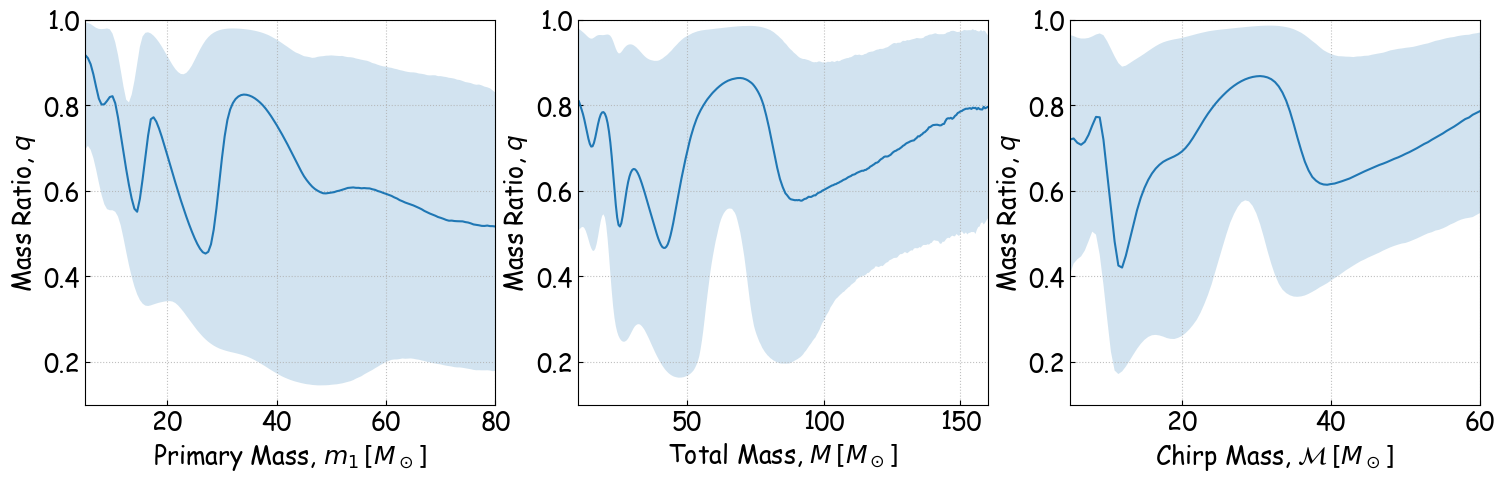

In [18]:
fig = plt.figure(figsize = (18.0, 5.0))
plt.subplot(1, 3, 1)
key1 = 'm1q'
plt.plot(xax[key1][1:], savgol_filter(p50_corr[key1], 5, 1), color=colours['o3'])
plt.fill_between(xax[key1][1:], savgol_filter(p5_corr[key1], 5, 1), savgol_filter(p95_corr[key1], 5, 1), alpha=0.2)
plt.xlim(5.0, 80.0)
plt.ylim(0.1, 1)
plt.grid(linestyle=':', alpha=0.8)
plt.xlabel('Primary Mass, $m_1\, [M_\odot]$')
plt.ylabel('Mass Ratio, $q$')
plt.subplot(1, 3, 2)
key2 = 'Mq'
plt.plot(xax[key2][1:], savgol_filter(p50_corr[key2], 5, 1), color=colours['o3'])
plt.fill_between(xax[key2][1:], savgol_filter(p5_corr[key2], 5, 1), savgol_filter(p95_corr[key2], 5, 1), alpha=0.2)
plt.xlim(10.0, 160.0)
plt.ylim(0.1, 1)
plt.grid(linestyle=':', alpha=0.8)
plt.xlabel('Total Mass, $M\, [M_\odot]$')
plt.ylabel('Mass Ratio, $q$')
plt.subplot(1, 3, 3)
key3 = 'mchq'
plt.plot(xax[key3][1:], savgol_filter(p50_corr[key3], 5, 1), color=colours['o3'])
plt.fill_between(xax[key3][1:], savgol_filter(p5_corr[key3], 5, 1), savgol_filter(p95_corr[key3], 5, 1), alpha=0.2)
plt.xlim(5.0, 60.0)
plt.ylim(0.1, 1)
plt.grid(linestyle=':', alpha=0.8)
plt.xlabel('Chirp Mass, $\mathcal{M}\, [M_\odot]$')
plt.ylabel('Mass Ratio, $q$')
plt.savefig(directory + '/corr_' + key1 + '_' + key2 + '_' + key3 + '.jpg', dpi = dpi, bbox_inches = 'tight')

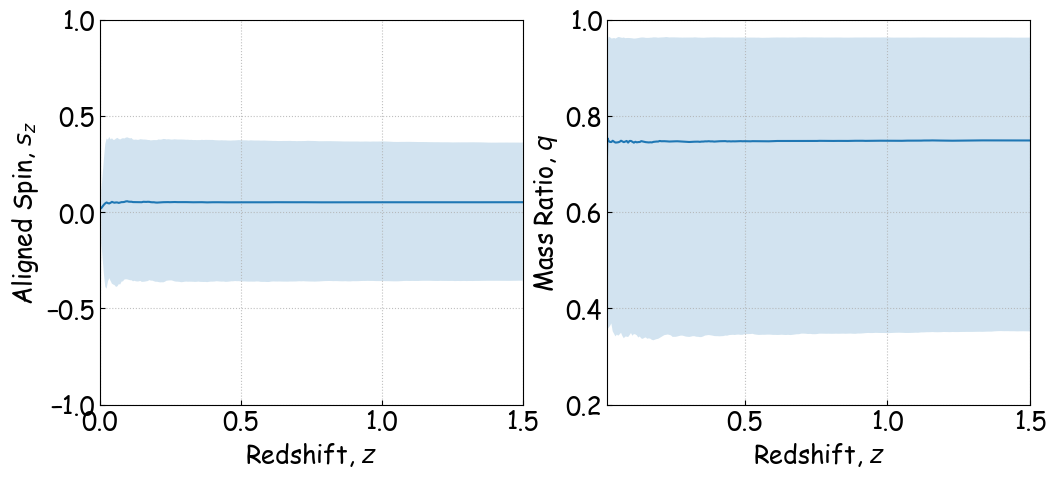

In [19]:
fig = plt.figure(figsize = (12.0, 5.0))
plt.subplot(1, 2, 1)
key1 = 'zsz'
plt.plot(xax[key1][1:], savgol_filter(p50_corr[key1], 5, 1), color=colours['o3'])
plt.fill_between(xax[key1][1:], savgol_filter(p5_corr[key1], 5, 1), savgol_filter(p95_corr[key1], 5, 1), alpha=0.2)
plt.xlim(0, 1.5)
plt.ylim(-1, 1)
plt.grid(linestyle=':', alpha=0.8)
plt.xlabel('Redshift, $z$')
plt.ylabel('Aligned Spin, $s_z$')
plt.subplot(1, 2, 2)
key2 = 'zq'
plt.plot(xax[key2][1:], savgol_filter(p50_corr[key2], 5, 1), color=colours['o3'])
plt.fill_between(xax[key2][1:], savgol_filter(p5_corr[key2], 5, 1), savgol_filter(p95_corr[key2], 5, 1), alpha=0.2)
plt.xlim(z_ax[4], 1.5)
plt.ylim(0.2, 1)
plt.grid(linestyle=':', alpha=0.8)
plt.xlabel('Redshift, $z$')
plt.ylabel('Mass Ratio, $q$')
plt.savefig(directory + '/corr_' + key1 + '_' + key2 + '.jpg', dpi = dpi, bbox_inches = 'tight')

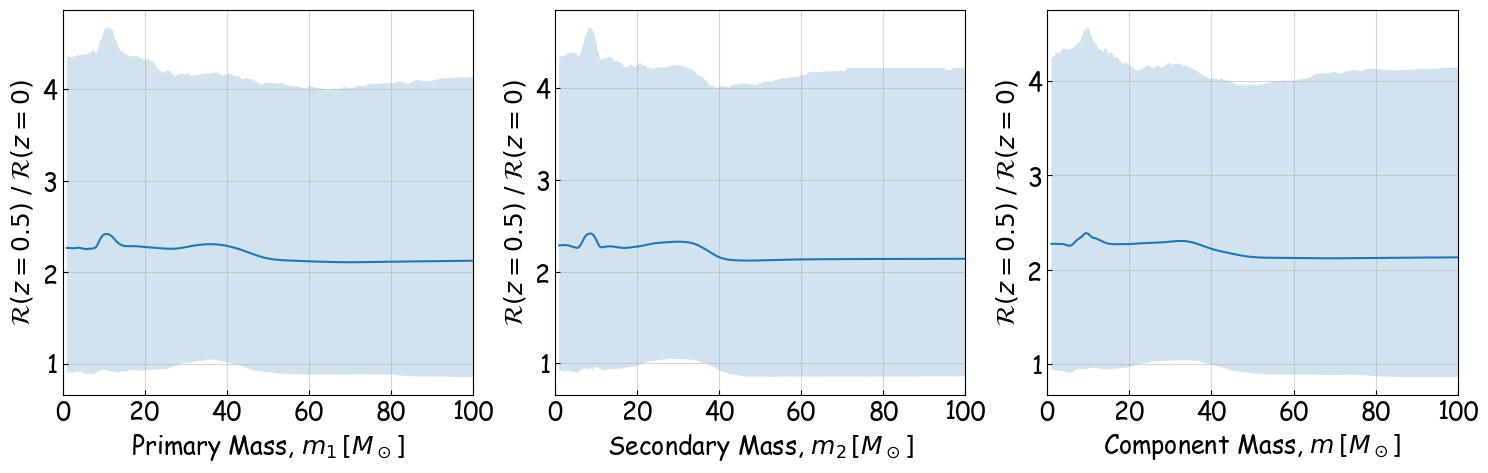

In [20]:
fig = plt.figure(figsize = (18.0, 5.0))
plt.subplot(1, 3, 1)
plt.plot(massax, np.mean(rate_ratio_m1, axis=0))
plt.fill_between(massax, np.percentile(rate_ratio_m1, 5.0, axis=0), np.percentile(rate_ratio_m1, 95.0, axis=0), alpha=0.2)
plt.grid(alpha=0.5)
plt.xlim(0, 100)
plt.xlabel('Primary Mass, $m_1\, [M_\odot]$')
plt.ylabel('$\mathcal{R}(z=0.5)\;/\;\mathcal{R}(z=0)$')
plt.subplot(1, 3, 2)
plt.plot(massax, np.mean(rate_ratio_m2, axis=0))
plt.fill_between(massax, np.percentile(rate_ratio_m2, 5.0, axis=0), np.percentile(rate_ratio_m2, 95.0, axis=0), alpha=0.2)
plt.grid(alpha=0.5)
plt.xlim(0, 100)
plt.xlabel('Secondary Mass, $m_2\, [M_\odot]$')
plt.ylabel('$\mathcal{R}(z=0.5)\;/\;\mathcal{R}(z=0)$')
plt.subplot(1, 3, 3)
rate_ratio_m = 0.5 * (np.array(rate_ratio_m1) + np.array(rate_ratio_m2))
plt.plot(massax, np.mean(rate_ratio_m, axis=0))
plt.fill_between(massax, np.percentile(rate_ratio_m, 5.0, axis=0), np.percentile(rate_ratio_m, 95.0, axis=0), alpha=0.2)
plt.grid(alpha=0.5)
plt.xlim(0, 100)
plt.xlabel('Component Mass, $m\, [M_\odot]$')
plt.ylabel('$\mathcal{R}(z=0.5)\;/\;\mathcal{R}(z=0)$')
plt.savefig(directory + '/rate_evol_with_mass.jpg', dpi = dpi, bbox_inches = 'tight')

In [21]:
n = (1000000 * gwts.flatten() / gwts.sum() + 0.5).astype(int)
k = np.repeat(kappa.flatten(), n)
l_m1 = np.repeat(locs_m1.flatten(), n)
l_m2 = np.repeat(locs_m2.flatten(), n)
l_mch = (l_m1 * l_m2) **.6 / (l_m1 + l_m2) ** 0.2
print (sum(1 * (np.random.choice(k[l_m1 < 20], size=1000000) > np.random.choice(k[l_m1 > 20], size=1000000))) / n.sum())
print (sum(1 * (np.random.choice(k[l_m2 < 20], size=1000000) > np.random.choice(k[l_m2 > 20], size=1000000))) / n.sum())
print (sum(1 * (np.random.choice(k[l_mch < 11], size=1000000) > np.random.choice(k[l_mch > 11], size=1000000))) / n.sum())

0.5528211878928042
0.5504454823082455
0.5486299430930986


In [22]:
rate_ratio_sz = []
for ii in range(npost):
    pdfsz, dRdsz_at_z = 0, 0
    for jj in range(ngauss):
        a, b = (-max_spin - locs_sz[ii][jj]) / stds_sz[ii][jj], (max_spin - locs_sz[ii][jj]) / stds_sz[ii][jj]
        pdf = ss.truncnorm.pdf(sz_ax, a = a, b = b, loc = locs_sz[ii][jj], scale = stds_sz[ii][jj]) * gwts[ii][jj]
        pdfsz += pdf#differential rate at z=0 for rate=1
        dRdsz_at_z += pdf * 1.5 ** kappa[ii][jj]#differential rate at z=0.5 for (rate=1 at z=0)
    
    rate_ratio_sz.append(dRdsz_at_z / pdfsz)

/tmp/ipykernel_1972482/361899453.py:10: RuntimeWarning: invalid value encountered in divide
  rate_ratio_sz.append(dRdsz_at_z / pdfsz)


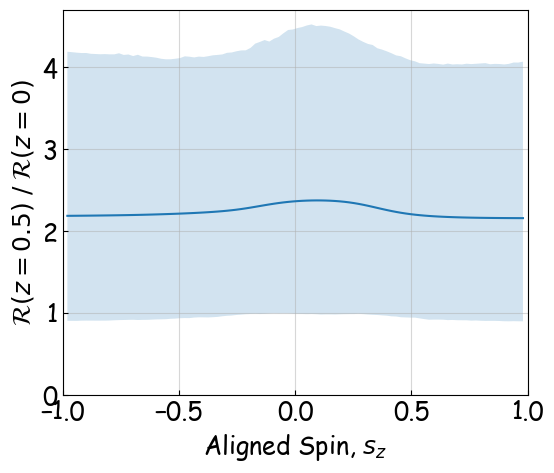

In [23]:
fig = plt.figure(figsize = (6.0, 5.0))
plt.plot(sz_ax, np.mean(rate_ratio_sz, axis=0))
plt.fill_between(sz_ax, np.percentile(rate_ratio_sz, 5.0, axis=0), np.percentile(rate_ratio_sz, 95.0, axis=0), alpha=0.2)
plt.xlim(-1, 1)
plt.ylim(0, None)
plt.grid(alpha=0.5)
plt.xlabel('Aligned Spin, $s_z$')
plt.ylabel('$\mathcal{R}(z=0.5)\;/\;\mathcal{R}(z=0)$')
plt.savefig(directory + '/rate_evol_with_spin.jpg', dpi = dpi, bbox_inches = 'tight')